# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### <font color="red">Exercise 10.1: Simulated annealing and the travelling salesman problem<font>

This time we have to find a possible solution to the travelling salesman problem by implementing a simulated annealing algorithm.

### The problem (same as Numerical exercises 9)

The travelling salesman problem consists of findind the shortest close path that passes for $N$ given points, never passing twice over a point. So the idea is finding the particular permutation of the cities that describes the path minimizing the followin function:
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$

(with $\vec{x}_{N+1}=\vec{x}_1$).

### Strategy for resolution

We wrote a C++ code to try and solve the problem with a simulated annealing algorithm. The idea behind it is the following:
- given $N$ cities with their positions in the plane, a single random path is invented;
- we express the length of the path as its energy function and calculate the probability of changing from one path to another with temperature $T$ as $p(change)=e^{-\frac{\Delta L}{T}}$, being $\Delta L$ the change of length betwwen the two paths (this is just a reproduction of the canonical ensamble);
- then we propose mutation of our path, that should be accepted or rejected by a Metropolis algorithm that samples the $p(change)$ probability distribution;
- by proceding in this way and progressively turning down the temperature from a very high one to a very low one, the path should put himself in a minimum-length situation, since while the temperature decreases only minimum length configurations become available for the system.

At the end, trusting in the power of simulated annealing, hopefully a good shortest path candidate should appear spontaneusly.


### Request

We were asked to test the code over 30 cities randomly placed **on** a circumference and 30 cities randomly placed **inside** a square. In the first case we can easily check the result, since we expect each city to be connected with its neighbours on the circumference in the shortest path case. In the second one we have no guarantees.

We showed the results via:

- a picture of $L$ of the path as a function of the iterations of the algorithm;
- a picture of the best path.

### Prevision and results

As far as the length of the path as a function of the iterations is concerned, we can see that the general tendency is for the path length to decrease, but the curve has quite a lot of jiggling. This is because every time the temperature is turned down, the length automatically decreases, but then there is a period of time (some iterations) in which the temperature is kept constant and the system length can oscillate at fixed temperature until another drop in the temperature makes it decrease.

We observe that the result for the best path in the circumference case is coherent with our prevision of finding neighbours points connected. We also can see that the result for the shortest path in the case of $30$ cities inside the square is the same as the one found by a genetic algorithm in Numerical exercises 9, since we used the same disposition of cities.

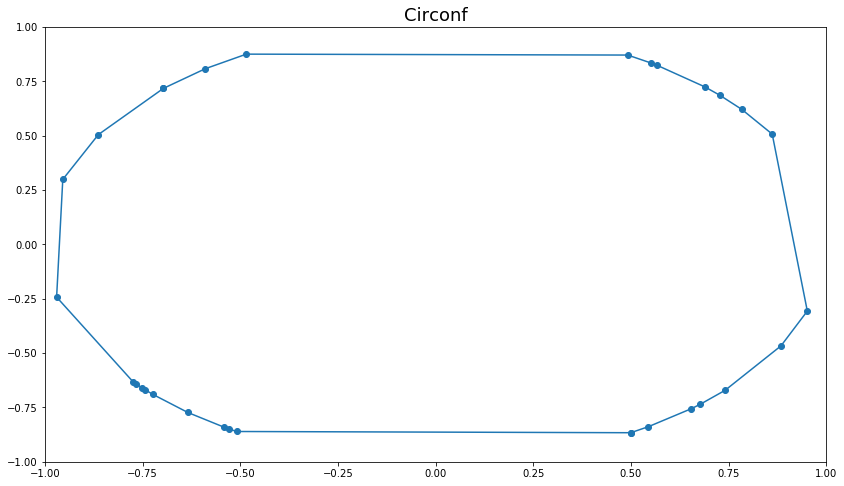

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x,y = np.loadtxt("./10.1/Circonf/final_cities.dat", usecols=(0,1), unpack='true')    

x=np.append(x, x[0])
y=np.append(y, y[0])

fig=plt.figure(figsize=(14, 8))
plt.title('Circonf', fontsize=18)
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.plot(x,y)
plt.scatter(x,y)
plt.show()

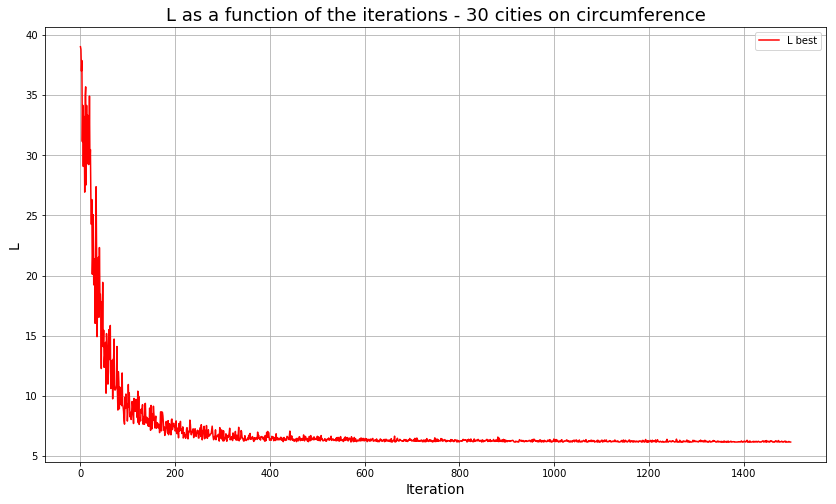

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

L_best = np.loadtxt("./10.1/Circonf/L_best.dat", usecols=(0), delimiter=' ', unpack='true')    

fig=plt.figure(figsize=(14, 8))
plt.plot(L_best,color='r', label='L best')
plt.legend()
plt.title('L as a function of the iterations - 30 cities on circumference', fontsize=18)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('L', fontsize=14)
plt.grid(True)
plt.show()

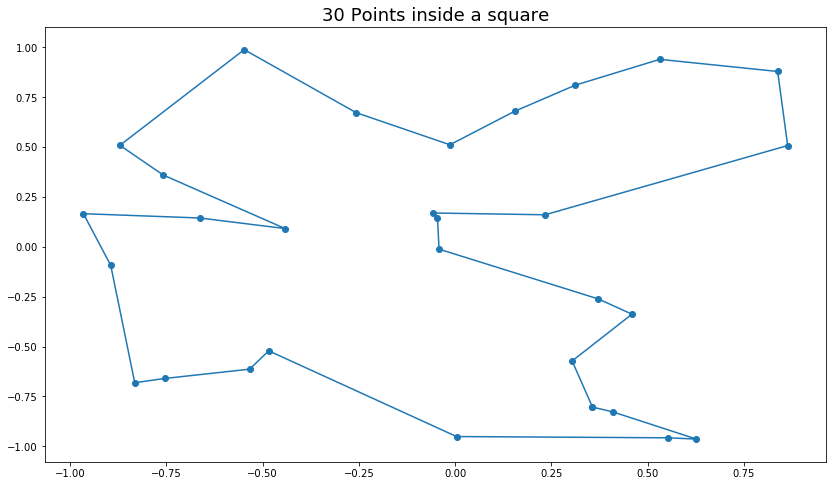

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x,y = np.loadtxt("./10.1/Square_30/final_cities.dat", usecols=(0,1), unpack='true')    

x=np.append(x, x[0])
y=np.append(y, y[0])

fig=plt.figure(figsize=(14, 8))
plt.title('30 Points inside a square', fontsize=18)
plt.plot(x,y)
plt.scatter(x,y)
plt.show()

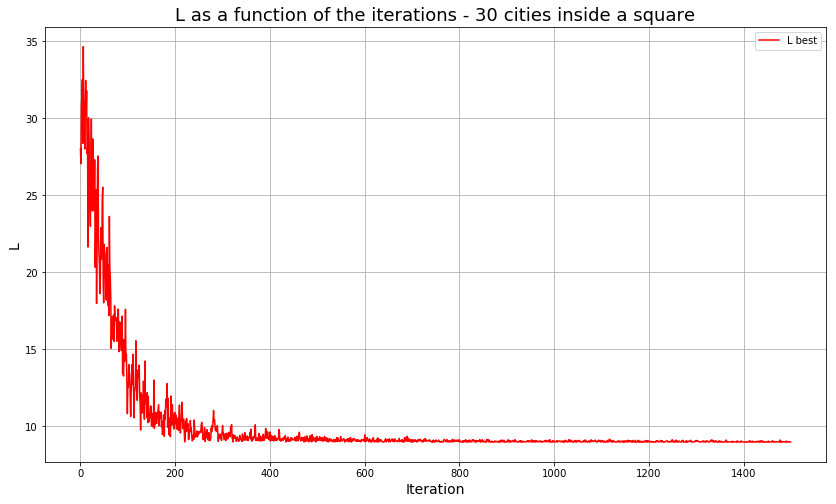

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

L_best = np.loadtxt("./10.1/Square_30/L_best.dat", usecols=(0), delimiter=' ', unpack='true')    

fig=plt.figure(figsize=(14, 8))
plt.plot(L_best,color='r', label='L best')
plt.legend()
plt.title('L as a function of the iterations - 30 cities inside a square', fontsize=18)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('L', fontsize=14)
plt.grid(True)
plt.show()

### Other cases

We also tried to apply the algorithm to 100 cities inside a square. The result, since we used the same disposition of cities as in the previous notebook, is slightly better than the one obtained with the genetic algorithm. The gentic found a path with length $16.2087$, while the annealing found a path $15.9714$ long. However there is still an intersection of line in the best path, meaning that it is probably possible to do better than that.

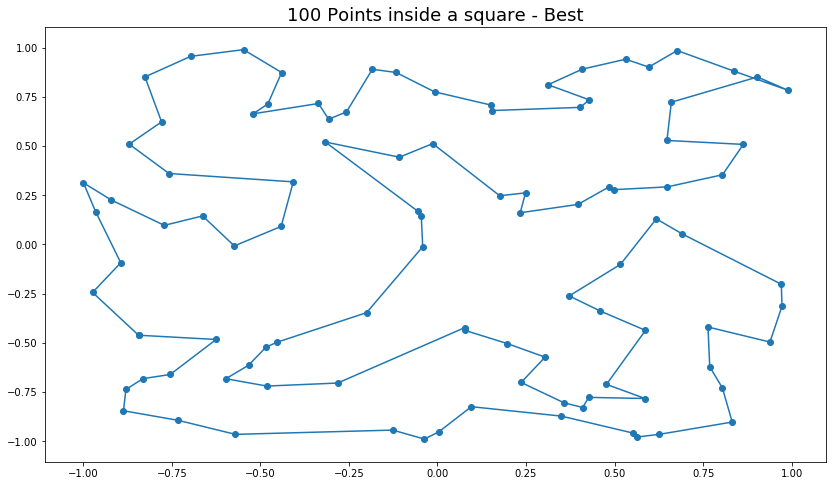

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x,y = np.loadtxt("./10.2/Square_100/final_cities.dat", usecols=(0,1), unpack='true')    

x=np.append(x, x[0])
y=np.append(y, y[0])

fig, ax1 = plt.subplots(1, 1, figsize=(14, 8))
plt.title('100 Points inside a square - Best', fontsize=18)
plt.plot(x,y)
plt.scatter(x,y)
plt.show()

### <font color="red">Exercise 10.2: Simulated annealing with parallel computing <font>

At this point we just exploit the code we have already written and parallelize it with MPI libraries. Then we perform a Random Search with parallel simulated annealing searches of the optimal path: each node should perform an independent SA search. 

At each step the nodes, which will be four in our case, communicate to the first one the length of their path and the first node prints in an output file only the best of the four.

At last, once the search is finished, all the nodes communicate to the first one the length of their path, then the first node writes in a variable which is passed to all the other nodes the number of the node which has the shortest path; then only that node prints its final path in another output file.

The results are identical to the privious one, maybe the only difference is that the curve of the best L as a function of the iterations here is a bit lower, since at every iteration we produced $4$ indipendent data and represented the minimum of them. In the last figure we showed both the "1 node" and "4 nodes" cases and the difference seems to be irrelevant.

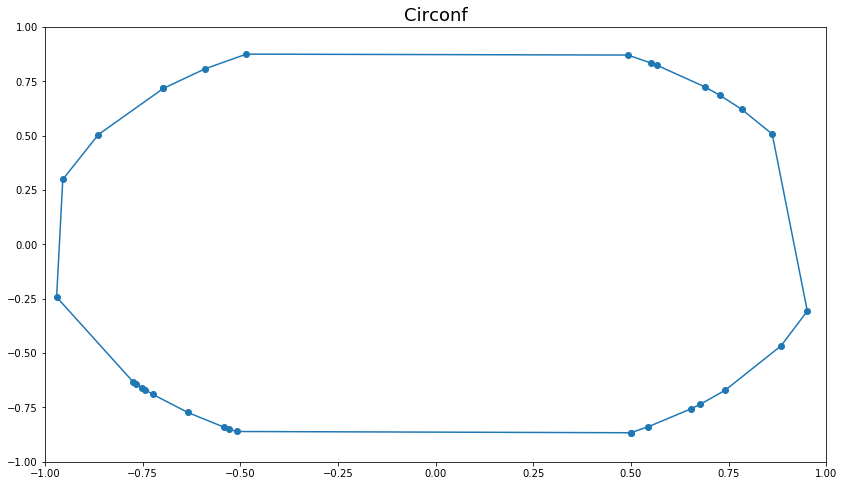

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x,y = np.loadtxt("./10.2/Circonf/final_cities.dat", usecols=(0,1), unpack='true')    

x=np.append(x, x[0])
y=np.append(y, y[0])

fig=plt.figure(figsize=(14, 8))
plt.title('Circonf', fontsize=18)
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.plot(x,y)
plt.scatter(x,y)
plt.show()

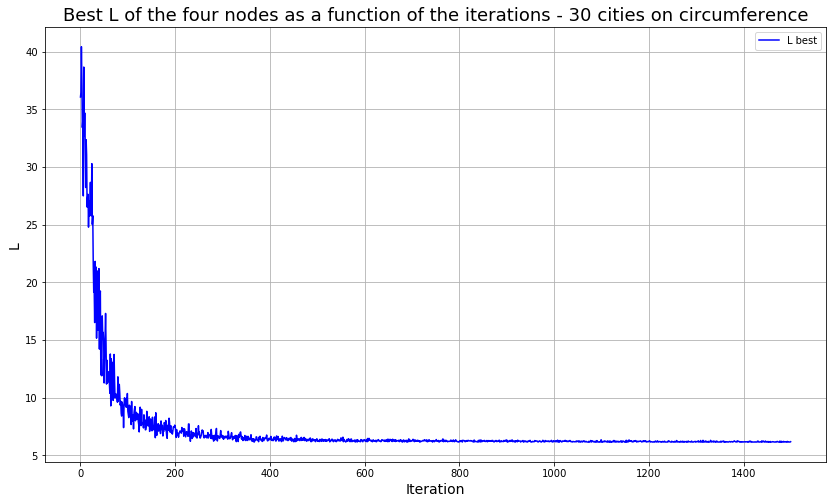

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

L_best = np.loadtxt("./10.2/Circonf/L_best.dat", usecols=(0), delimiter=' ', unpack='true')    

fig=plt.figure(figsize=(14, 8))
plt.plot(L_best,color='b', label='L best')
plt.legend()
plt.title('Best L of the four nodes as a function of the iterations - 30 cities on circumference', fontsize=18)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('L', fontsize=14)
plt.grid(True)
plt.show()

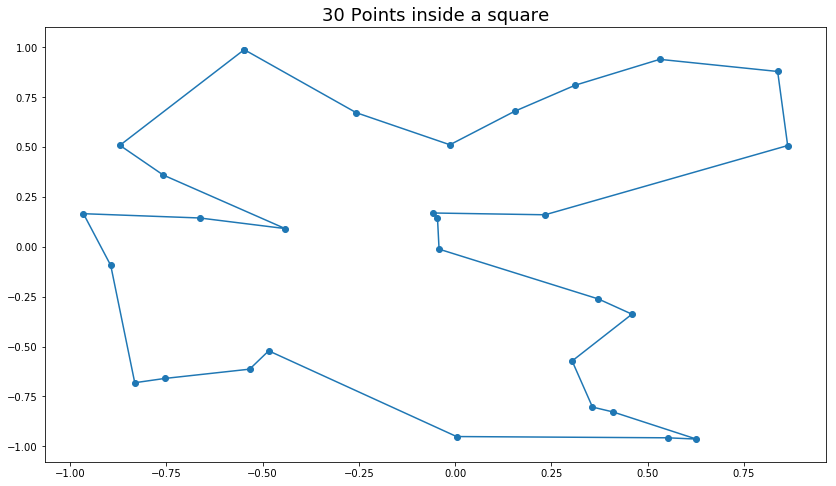

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x,y = np.loadtxt("./10.2/Square_30/final_cities.dat", usecols=(0,1), unpack='true')    

x=np.append(x, x[0])
y=np.append(y, y[0])

fig=plt.figure(figsize=(14, 8))
plt.title('30 Points inside a square', fontsize=18)
plt.plot(x,y)
plt.scatter(x,y)
plt.show()

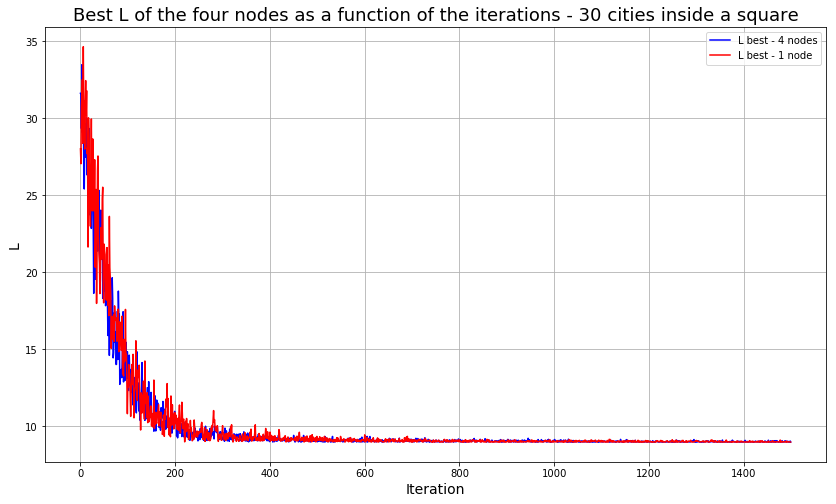

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

L_best = np.loadtxt("./10.2/Square_30/L_best.dat", usecols=(0), delimiter=' ', unpack='true')    
L_best_1 = np.loadtxt("./10.1/Square_30/L_best.dat", usecols=(0), delimiter=' ', unpack='true')    

fig=plt.figure(figsize=(14, 8))
plt.plot(L_best,color='b', label='L best - 4 nodes')
plt.plot(L_best_1,color='r', label='L best - 1 node')
plt.legend()
plt.title('Best L of the four nodes as a function of the iterations - 30 cities inside a square', fontsize=18)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('L', fontsize=14)
plt.grid(True)
plt.show()